In [1]:
#import ....
import json    # required for json output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    # required for graphing scatterplots
from pandas.plotting import parallel_coordinates    # required for parallel plotting
food = pd.read_csv("food_nutrient_2011_13_AHS.csv", header=0,low_memory=False)

In [2]:
#Question 1
nfoods = food.shape[0]    # number of rows
nattributes = food.shape[1]    # number of columns
datatypes = food.dtypes

#output
print("***")
print ("Q1\n")
print("Number of foods:", nfoods)
print("Number of attributes:", nattributes)
print(food.dtypes)
print("***")

***
Q1

Number of foods: 5740
Number of attributes: 57
Food ID                                                object
Survey ID                                               int64
Food Name                                              object
Survey flag                                            object
Energy, with dietary fibre (kJ)                         int64
Energy, without dietary fibre (kJ)                      int64
Moisture (g)                                          float64
Protein (g)                                           float64
Total fat (g)                                         float64
Available carbohydrates, with sugar alcohols (g)      float64
Available carbohydrates, without sugar alcohol (g)    float64
Starch (g)                                            float64
Total sugars (g)                                      float64
Added sugars (g)                                      float64
Free sugars (g)                                       float64
Dietary fibre (

In [3]:
#Question 2
medianMagnesium = food["Magnesium (Mg) (mg)"].median()
medianMagnesium = round(medianMagnesium, 1)

MeanMoisture = food["Moisture (g)"].mean()
MeanMoisture = round(MeanMoisture, 1)

#output
print("***")
print("Q2")
print("Median value of Magnesium:", medianMagnesium)
print("Mean value of Moisture:", MeanMoisture)
print("***")

***
Q2
Median value of Magnesium: 22.0
Mean value of Moisture: 56.3
***


In [4]:
#Question 3

# Part a
food["Survey ID"] = food["Survey ID"].astype("str")

# Part b
category = [x[:2] for x in food["Survey ID"]]    # slice the first two characters
food["Food Category"] = category

# Part c
num13 = food["Food Category"].value_counts()["13"]    # count the number of foods with category 13
percent13 = round(num13/food.shape[0]*100, 1)

#output
print("***")
print("Q3")
print("% of foods which are Cereal based products and dishes (Food category 13) =", percent13)
print("***")

***
Q3
% of foods which are Cereal based products and dishes (Food category 13) = 15.9
***


Text(0, 0.5, 'Amount (g)')

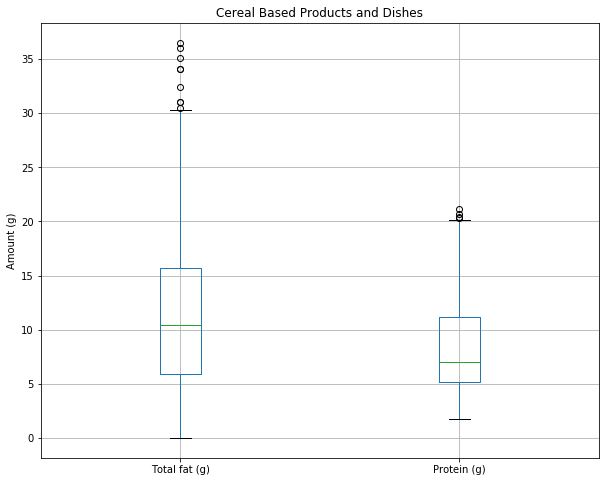

In [5]:
#Question 4
cereals = food.loc[food["Food Category"] == "13"]    # find all foods with category 13
cereals.boxplot(["Total fat (g)", "Protein (g)"], figsize=(10, 8))
plt.title("Cereal Based Products and Dishes")
plt.ylabel("Amount (g)")

Text(0, 0.5, 'Average Total sugars (g)')

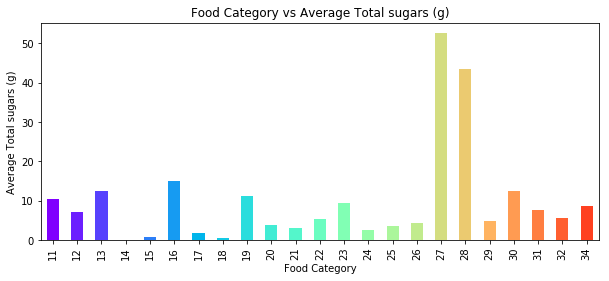

In [6]:
#Question 5
grouped = food.groupby("Food Category")

# list of colours for aesthetic purposes
cmap = plt.get_cmap('rainbow')
colors = [cmap(x) for x in np.linspace(0, 1, 25)]

grouped["Total sugars (g)"].mean().plot(kind="bar", figsize=(10, 4), color=colors)    # plot bar graph
plt.title("Food Category vs Average Total sugars (g)")
plt.xlabel("Food Category")
plt.ylabel("Average Total sugars (g)")

Text(0.5, 1.0, 'Total sugars (g) vs Protein (g)')

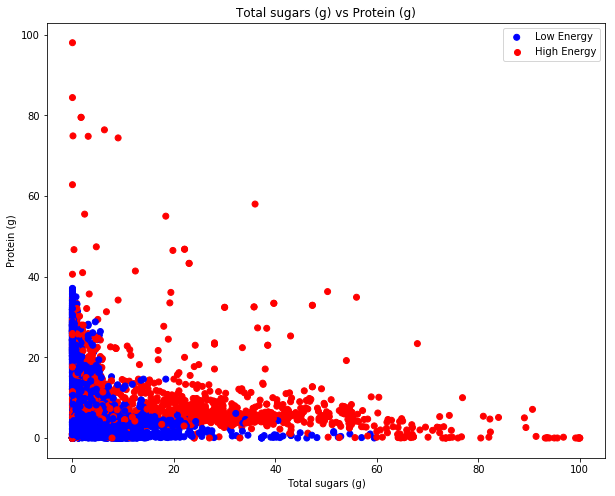

In [7]:
#Question 6

#Part a
EnergyLevel = [1 if x is x>1000 else 0 for x in food["Energy, with dietary fibre (kJ)"]]
food["Energy Level"] = EnergyLevel

#Part b
plt.rcParams['figure.figsize'] = (10.0, 8.0)    # make plot size larger
color = ["red" if x is x==1 else "blue" for x in EnergyLevel]
plt.scatter(food["Total sugars (g)"], food["Protein (g)"], c=color)    # plot graph
plt.scatter([],[],color='r')
plt.legend(["Low Energy", "High Energy"])
plt.xlabel("Total sugars (g)")
plt.ylabel("Protein (g)")
plt.title("Total sugars (g) vs Protein (g)")

Text(0.5, 1.0, 'The relationship between Total sugars (g), Total fat (g), and Protein (g)')

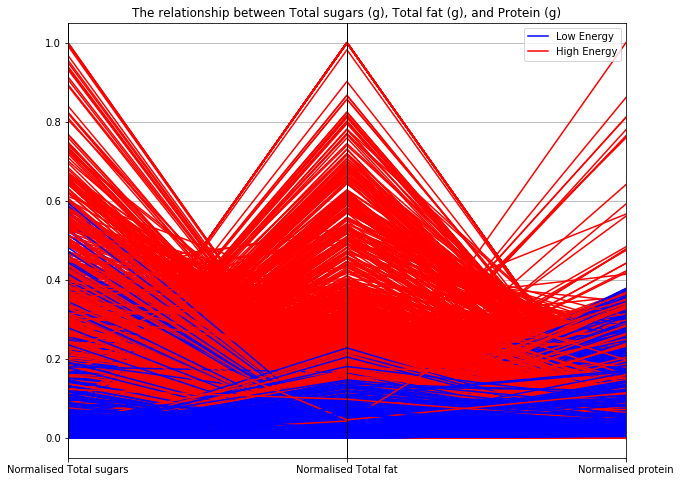

In [8]:
#Question 7

#Part a
# normalise Protein values
maxprotein = food["Protein (g)"].max()
minprotein = food["Protein (g)"].min()
normprotein = [(x-minprotein)/(maxprotein-minprotein) for x in food["Protein (g)"]]
food["Normalised protein"] = normprotein

# normalise Fat values
maxfat = food["Total fat (g)"].max()
minfat = food["Total fat (g)"].min()
normfat = [(x-minfat)/(maxfat-minfat) for x in food["Total fat (g)"]]
food["Normalised Total fat"] = normfat

# normalise Sugar values
maxsugar = food["Total sugars (g)"].max()
minsugar = food["Total sugars (g)"].min()
normsugar = [(x-minsugar)/(maxsugar-minsugar) for x in food["Total sugars (g)"]]
food["Normalised Total sugars"] = normsugar

#Part b
#takes some time to load
plt.rcParams['figure.figsize'] = (10, 8)    # make plot size larger
parallel_coordinates(food, 
                     class_column='Energy Level', 
                     cols=["Normalised Total sugars", "Normalised Total fat", "Normalised protein"], 
                     color=['b','r'])
plt.legend(['Low Energy','High Energy'])
plt.title("The relationship between Total sugars (g), Total fat (g), and Protein (g)")

***
Q8

1. Shortening, commercial, animal fat (for short pastry, pie bases, tarts and flans)  900.8
2. Dripping, beef                                                                     900.8
3. Lard                                                                               900.8
4. Fat, solid, vegetable oil based                                                    900.8
5. Ghee, clarified butter                                                             900.3
***


Text(0.5, 0, 'Food Category')

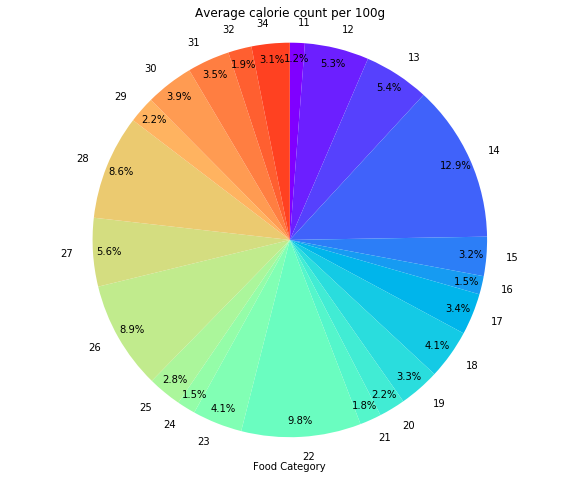

In [9]:
#Question 8

#Part a
# create a temporary function to calculate calories
fn = lambda x: 4*x["Protein (g)"] + 4*x["Available carbohydrates, with sugar alcohols (g)"] + \
9*x["Total fat (g)"] + 7*x["Alcohol (g)"]

food["calorie count per 100g"] = food.apply(fn, axis=1)

#Part b
calories = round(food["calorie count per 100g"], 1)
calories.index = food["Food Name"]
calories = calories.sort_values(ascending=False)

#output
print("***")
print("Q8\n")
for i in range(5):
    print(f"{i+1}. {calories.index[i]}{(83-len(calories.index[i]))*' '}{calories.values[i]}")
print("***")

#Part c
calorie_grouped = food.groupby("Food Category")["calorie count per 100g"].mean()

# list of colours to ensure different colours for each slice
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, 25)]

labels = calorie_grouped.index
sizes = calorie_grouped.values

plt.rcParams['figure.figsize'] = (10.0, 8.0)    # make plot size larger
pie = plt.pie(sizes, labels=labels, autopct="%1.1f%%", 
              colors=colors, pctdistance=0.92, startangle=90, counterclock=False)

plt.axis('equal')    # equal aspect ratio to make the pie circular

plt.title("Average calorie count per 100g")
plt.xlabel("Food Category")

In [10]:
#Question 9

#Part a
classified = pd.read_csv("8i. Australian Health Survey Classification System.csv", header=0,low_memory=False)
classified["Food Group Code"] = classified["Food Group Code"].astype("str")
food = food.merge(classified, left_on="Food Category", right_on="Food Group Code")
food = food.drop(columns=["Food Group Code"])    # delete the duplicate column
food = food.rename(index=str, columns={"Food Group and Sub-Group Name": "Food Category Name"})

#Part b
sugar_grouped = food.groupby("Food Category Name")["Total sugars (g)"].mean()
sugar_grouped = sugar_grouped.rename("Mean total sugars (g) by category")
sugar_grouped = round(sugar_grouped, 1)
parsed = json.loads(sugar_grouped.to_json())
print("{\n\"Mean total sugars (g) by category\":", json.dumps(parsed, indent=4), "\n}")    # output the json

{
"Mean total sugars (g) by category": {
    "Alcoholic beverages": 4.9,
    "Cereal based products and dishes": 12.5,
    "Cereals and cereal products": 7.1,
    "Confectionery and cereal/nut/fruit/seed bars": 43.5,
    "Dairy & meat substitutes": 3.7,
    "Egg products and dishes": 1.9,
    "Fats and oils": 0.1,
    "Fish and seafood products and dishes": 0.8,
    "Fruit products and dishes": 14.9,
    "Infant formulae and foods": 5.6,
    "Legume and pulse products and dishes": 3.7,
    "Meat, poultry and game products and dishes ": 0.5,
    "Milk products and dishes": 11.1,
    "Miscellaneous": 7.6,
    "Non-alcoholic beverages": 10.4,
    "Reptiles, amphibia and insects": 8.7,
    "Savoury sauces and condiments": 9.5,
    "Seed and nut products and dishes": 5.4,
    "Snack foods": 4.5,
    "Soup": 3.2,
    "Special dietary foods": 12.5,
    "Sugar products and dishes": 52.6,
    "Vegetable products and dishes": 2.5
} 
}
